#Importing Libraries

In [10]:
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.preprocessing import LabelEncoder
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score
from sklearn import tree
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.ensemble import AdaBoostRegressor

#Dataset Loading


In [11]:

ds=pd.read_csv('crime_against_women.csv')
ds

,State/UT,Dowry Deaths,Murder with Rape,Acid Attack,Cruelty by Husband or his relatives,Kidnapping & Abduction,Procuration of Minor Girls,Sexual Assault of Children,year,Total crimes
0,Andhra Pradesh,152,6.0,2,7429.0,741.0,150.0,56,2021,8480
1,Arunachal Pradesh,0,0.0,0,66.0,86.0,8.0,4,2021,164
2,Assam,193,27.0,3,10598.0,5703.0,1286.0,205,2021,18015
3,Bihar,1081,0.0,4,NaN,6188.0,0.0,697,2021,7970
4,Chhattisgarh,75,3.0,0,582.0,1474.0,2.0,544,2021,2680
...,...,...,...,...,...,...,...,...,...,...
3605,gujarat,0,2.0,0,0.0,1.0,1.0,1,2016,5
3606,madhya Pradesh,0,1.0,0,1.0,1.0,1.0,1,2016,5
3607,bihar,0,0.0,0,0.0,0.0,1.0,1,2016,2
3608,manipur,0,1.0,0,0.0,1.0,1.0,1,2016,4


#EDA

In [12]:
ds.head()

,State/UT,Dowry Deaths,Murder with Rape,Acid Attack,Cruelty by Husband or his relatives,Kidnapping & Abduction,Procuration of Minor Girls,Sexual Assault of Children,year,Total crimes
0,Andhra Pradesh,152,6.0,2,7429.0,741.0,150.0,56,2021,8480
1,Arunachal Pradesh,0,0.0,0,66.0,86.0,8.0,4,2021,164
2,Assam,193,27.0,3,10598.0,5703.0,1286.0,205,2021,18015
3,Bihar,1081,0.0,4,NaN,6188.0,0.0,697,2021,7970
4,Chhattisgarh,75,3.0,0,582.0,1474.0,2.0,544,2021,2680


In [13]:
ds.shape

(3610, 10)

In [14]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3610 entries, 0 to 3609
Data columns (total 10 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   State/UT                             3610 non-null   object 
 1   Dowry Deaths                         3610 non-null   int64  
 2   Murder with Rape                     3609 non-null   float64
 3   Acid Attack                          3610 non-null   int64  
 4   Cruelty by Husband or his relatives  3608 non-null   float64
 5   Kidnapping & Abduction               3609 non-null   float64
 6   Procuration of Minor Girls           3609 non-null   float64
 7   Sexual Assault of Children           3610 non-null   int64  
 8   year                                 3610 non-null   int64  
 9   Total crimes                         3610 non-null   int64  
dtypes: float64(4), int64(5), object(1)
memory usage: 282.2+ KB


#Treating Null Values

In [70]:
pd.read_csv('crime_against_women.csv')['State/UT'].sort_values().unique()

array(['A & N ISLANDS', 'A & N Islands', 'A&N Islands', 'ANDHRA PRADESH',
       'ARUNACHAL PRADESH', 'ASSAM', 'Andhra Pradesh', 'Andra pradesh',
       'Arunachal Pradesh', 'Assam', 'BIHAR', 'Bihar', 'CHANDIGARH',
       'CHHATTISGARH', 'Chandigarh', 'Chhattisgarh', 'D & N HAVELI',
       'D&N Haveli', 'D&N Haveli and Daman & Diu', 'DAMAN & DIU', 'DELHI',
       'Daman & Diu', 'Delhi', 'Delhi UT', 'GOA', 'GUJARAT', 'Goa',
       'Gujarat', 'HARYANA', 'HIMACHAL PRADESH', 'Haryana',
       'Himachal Pradesh', 'JAMMU & KASHMIR', 'JHARKHAND',
       'Jammu & Kashmir', 'Jharkhand', 'KARNATAKA', 'KERALA', 'Karnataka',
       'Kerala', 'LAKSHADWEEP', 'Ladakh', 'Lakshadweep', 'MADHYA PRADESH',
       'MAHARASHTRA', 'MANIPUR', 'MEGHALAYA', 'MIZORAM', 'Madhya Pradesh',
       'Maharashtra', 'Manipur', 'Meghalaya', 'Mizoram', 'NAGALAND',
       'Nagaland', 'ODISHA', 'Odisha', 'PUDUCHERRY', 'PUNJAB',
       'Puducherry', 'Punjab', 'RAJASTHAN', 'Rajasthan', 'SIKKIM',
       'Sikkim', 'TAMIL NADU',

In [66]:
ds.describe()

,State/UT,Dowry Deaths,Murder with Rape,Acid Attack,Cruelty by Husband or his relatives,Kidnapping & Abduction,Procuration of Minor Girls,Sexual Assault of Children,year,Total crimes
count,3610.000000,3610.000000,3610.000000,3610.000000,3610.000000,3610.000000,3610.000000,3610.000000,3610.000000,3610.000000
mean,40.222715,29.642659,69.144044,3.031856,416.269252,186.237950,5.622438,20.160942,2012.980886,729.901662
std,22.803721,147.983425,260.317257,6.176120,1677.294034,805.078358,57.376876,189.764704,1.886770,2708.919689
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2011.000000,0.000000
25%,22.000000,0.000000,9.000000,0.000000,13.000000,10.000000,1.000000,0.000000,2012.000000,62.000000
50%,43.000000,5.000000,26.000000,1.000000,69.000000,36.000000,1.000000,0.000000,2013.000000,178.000000
75%,61.000000,17.000000,54.000000,4.000000,204.000000,87.000000,1.000000,1.000000,2014.000000,373.000000
max,80.000000,2711.000000,5076.000000,44.000000,23278.000000,15747.000000,1474.000000,3899.000000,2021.000000,36764.000000


In [15]:
ds.isnull().sum()

State/UT                               0
Dowry Deaths                           0
Murder with Rape                       1
Acid Attack                            0
Cruelty by Husband or his relatives    2
Kidnapping & Abduction                 1
Procuration of Minor Girls             1
Sexual Assault of Children             0
year                                   0
Total crimes                           0
dtype: int64

In [16]:
m=ds["Murder with Rape"].mode().values[0]
ds["Murder with Rape"]=ds["Murder with Rape"].replace(np.NaN,m)

In [17]:
ds.isnull().sum()

State/UT                               0
Dowry Deaths                           0
Murder with Rape                       0
Acid Attack                            0
Cruelty by Husband or his relatives    2
Kidnapping & Abduction                 1
Procuration of Minor Girls             1
Sexual Assault of Children             0
year                                   0
Total crimes                           0
dtype: int64

In [18]:
m=ds["Cruelty by Husband or his relatives"].mode().values[0]
ds["Cruelty by Husband or his relatives"]=ds["Cruelty by Husband or his relatives"].replace(np.NaN,m)

In [19]:

ds.isnull().sum()


State/UT                               0
Dowry Deaths                           0
Murder with Rape                       0
Acid Attack                            0
Cruelty by Husband or his relatives    0
Kidnapping & Abduction                 1
Procuration of Minor Girls             1
Sexual Assault of Children             0
year                                   0
Total crimes                           0
dtype: int64

In [20]:
m=ds["Kidnapping & Abduction"].mode().values[0]
ds["Kidnapping & Abduction"]=ds["Kidnapping & Abduction"].replace(np.NaN,m)

In [21]:

ds.isnull().sum()

State/UT                               0
Dowry Deaths                           0
Murder with Rape                       0
Acid Attack                            0
Cruelty by Husband or his relatives    0
Kidnapping & Abduction                 0
Procuration of Minor Girls             1
Sexual Assault of Children             0
year                                   0
Total crimes                           0
dtype: int64

In [22]:
ds['Procuration of Minor Girls '].unique()

array([1.500e+02, 8.000e+00, 1.286e+03, 0.000e+00, 2.000e+00, 8.730e+02,
       4.000e+00, 8.000e+01, 2.800e+02, 1.050e+02, 1.100e+01, 1.200e+01,
       6.100e+01, 2.300e+01, 1.000e+00, 5.400e+01, 1.970e+02, 7.600e+01,
       1.090e+02,       nan, 3.400e+01, 2.170e+02, 6.000e+01, 1.000e+01,
       1.399e+03, 8.930e+02, 3.520e+02, 7.100e+01, 2.400e+01, 7.000e+01,
       2.100e+01, 8.300e+01, 1.480e+02, 5.100e+01, 1.300e+01, 9.500e+01,
       4.800e+01, 9.000e+00, 1.474e+03, 8.130e+02, 3.000e+00, 3.040e+02,
       5.800e+01, 2.000e+01, 2.200e+01, 3.000e+01, 3.600e+01, 9.900e+01,
       7.400e+01, 1.055e+03, 7.890e+02, 2.310e+02, 2.600e+01, 5.000e+00,
       3.200e+01, 5.000e+01, 1.500e+01, 8.200e+01, 4.600e+01, 1.700e+01,
       1.025e+03, 6.800e+02, 2.580e+02, 5.200e+01, 7.800e+01, 6.000e+00])

In [23]:
m=ds['Procuration of Minor Girls '].mode().values[0]
ds['Procuration of Minor Girls ']=ds['Procuration of Minor Girls '].replace(np.NaN,m)

In [24]:
ds.isnull().sum()

State/UT                               0
Dowry Deaths                           0
Murder with Rape                       0
Acid Attack                            0
Cruelty by Husband or his relatives    0
Kidnapping & Abduction                 0
Procuration of Minor Girls             0
Sexual Assault of Children             0
year                                   0
Total crimes                           0
dtype: int64

#Encoding Using LabelEncoder

In [26]:
ds["State/UT"].nunique()

81

In [27]:
l=LabelEncoder()
ds["State/UT"]=l.fit_transform(ds["State/UT"])
ds

,State/UT,Dowry Deaths,Murder with Rape,Acid Attack,Cruelty by Husband or his relatives,Kidnapping & Abduction,Procuration of Minor Girls,Sexual Assault of Children,year,Total crimes
0,6,152,6.0,2,7429.0,741.0,150.0,56,2021,8480
1,8,0,0.0,0,66.0,86.0,8.0,4,2021,164
2,9,193,27.0,3,10598.0,5703.0,1286.0,205,2021,18015
3,11,1081,0.0,4,0.0,6188.0,0.0,697,2021,7970
4,15,75,3.0,0,582.0,1474.0,2.0,544,2021,2680
...,...,...,...,...,...,...,...,...,...,...
3605,78,0,2.0,0,0.0,1.0,1.0,1,2016,5
3606,79,0,1.0,0,1.0,1.0,1.0,1,2016,5
3607,77,0,0.0,0,0.0,0.0,1.0,1,2016,2
3608,80,0,1.0,0,0.0,1.0,1.0,1,2016,4


In [28]:
a=ds.corr()
a

,State/UT,Dowry Deaths,Murder with Rape,Acid Attack,Cruelty by Husband or his relatives,Kidnapping & Abduction,Procuration of Minor Girls,Sexual Assault of Children,year,Total crimes
State/UT,1.000000,0.052384,0.019446,0.077247,0.043897,0.036307,-0.052441,0.044121,-0.060611,0.044967
Dowry Deaths,0.052384,1.000000,0.458748,0.170357,0.624505,0.802981,0.088061,0.485343,0.199157,0.760284
Murder with Rape,0.019446,0.458748,1.000000,0.066711,0.508233,0.434569,-0.013761,-0.019444,-0.022526,0.563493
Acid Attack,0.077247,0.170357,0.066711,1.000000,0.152195,0.163566,0.000398,0.131448,-0.011623,0.170093
Cruelty by Husband or his relatives,0.043897,0.624505,0.508233,0.152195,1.000000,0.756037,0.258267,0.412812,0.281870,0.961531
Kidnapping & Abduction,0.036307,0.802981,0.434569,0.163566,0.756037,1.000000,0.209214,0.577085,0.325550,0.896166
Procuration of Minor Girls,-0.052441,0.088061,-0.013761,0.000398,0.258267,0.209214,1.000000,0.148174,0.232585,0.257121
Sexual Assault of Children,0.044121,0.485343,-0.019444,0.131448,0.412812,0.577085,0.148174,1.000000,0.335117,0.525249
year,-0.060611,0.199157,-0.022526,-0.011623,0.281870,0.325550,0.232585,0.335117,1.000000,0.308388
Total crimes,0.044967,0.760284,0.563493,0.170093,0.961531,0.896166,0.257121,0.525249,0.308388,1.000000


In [29]:
ds.shape


(3610, 10)

#Visualization

<Axes: >

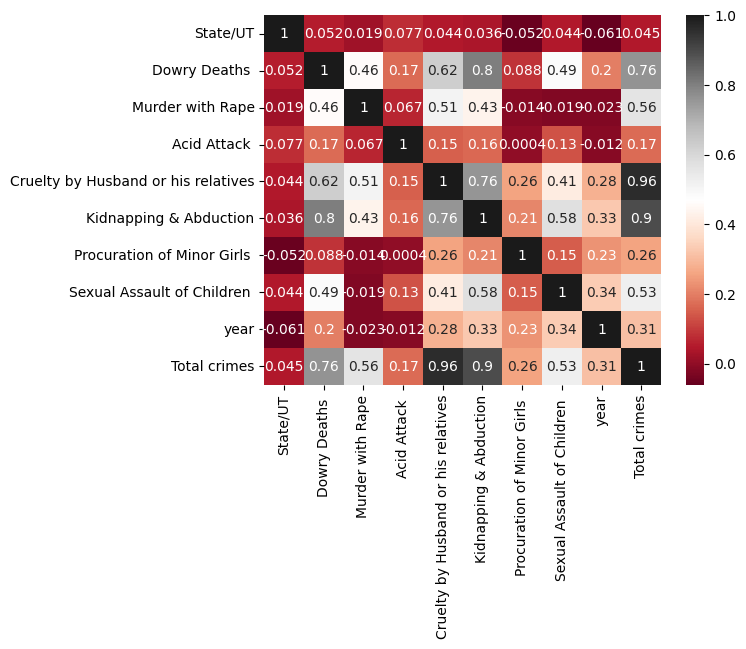

In [30]:
sn.heatmap(a,annot=True,cmap="RdGy")

<Axes: xlabel='Dowry Deaths ', ylabel='Count'>

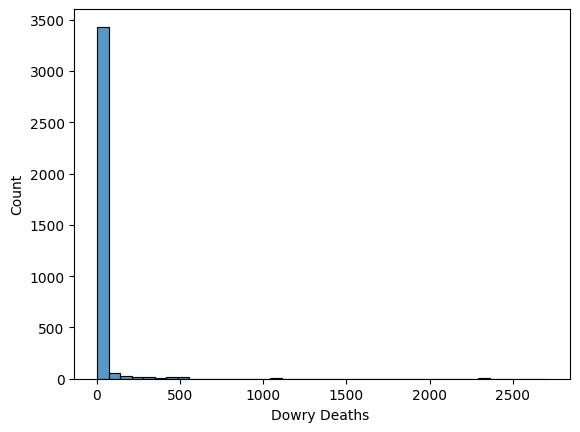

<Axes: xlabel='Dowry Deaths ', ylabel='Count'>

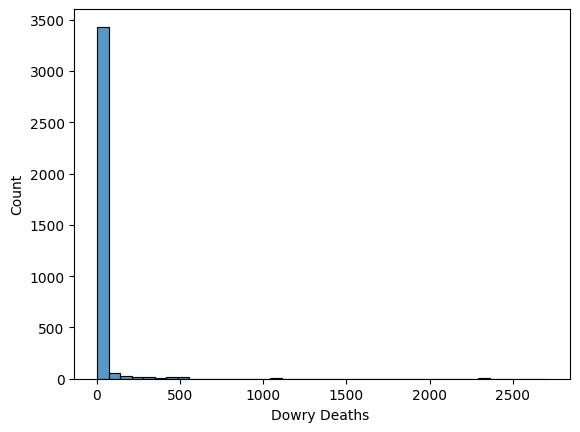

In [ ]:
sn.histplot(x="Dowry Deaths ",data=ds,bins=39)

<Axes: xlabel='Dowry Deaths ', ylabel='Murder with Rape'>

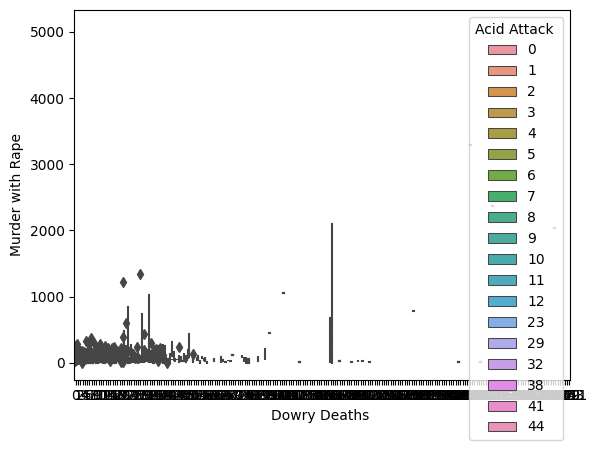

In [33]:

sn.boxplot(x="Dowry Deaths ",y="Murder with Rape",data=ds,hue="Acid Attack ")

In [34]:
ds.columns

Index(['State/UT', 'Dowry Deaths ', 'Murder with Rape', 'Acid Attack ',
       'Cruelty by Husband or his relatives', 'Kidnapping & Abduction',
       'Procuration of Minor Girls ', 'Sexual Assault of Children ', 'year',
       'Total crimes'],
      dtype='object')

([<matplotlib.patches.Wedge at 0x226d9d06f40>,
 [Text(0.764120788592483, 1.051722121304293, 'Dowry Deaths '),
  Text(-1.0461622061152445, 0.33991857627391475, 'Murder with Rape'),
  Text(-0.37082021159948414, -1.1412678785759782, 'Acid Attack '),
  Text(0.8899188088302002, -0.6465636192133282, 'Cruelty by Husband or his relatives')])

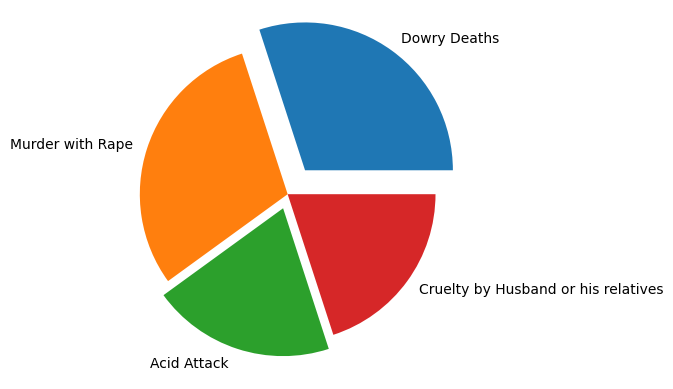

In [35]:
labels = 'Dowry Deaths ', 'Murder with Rape', 'Acid Attack ', 'Cruelty by Husband or his relatives'
sizes = [15, 15, 10, 10]
explode=(0.2,0,0.1,0)
fig, ax = plt.subplots()
ax.pie(sizes, labels=labels,explode=explode)

#Sampling

In [71]:
x

,State/UT,Dowry Deaths,Murder with Rape,Acid Attack,Kidnapping & Abduction,Procuration of Minor Girls,Sexual Assault of Children,year,Total crimes
0,6,152,6.0,2,741.0,150.0,56,2021,8480
1,8,0,0.0,0,86.0,8.0,4,2021,164
2,9,193,27.0,3,5703.0,1286.0,205,2021,18015
3,11,1081,0.0,4,6188.0,0.0,697,2021,7970
4,15,75,3.0,0,1474.0,2.0,544,2021,2680
...,...,...,...,...,...,...,...,...,...
3605,78,0,2.0,0,1.0,1.0,1,2016,5
3606,79,0,1.0,0,1.0,1.0,1,2016,5
3607,77,0,0.0,0,0.0,1.0,1,2016,2
3608,80,0,1.0,0,1.0,1.0,1,2016,4


In [72]:
x=ds.drop(columns=["State/UT", "Cruelty by Husband or his relatives"],axis=1)
x

,Dowry Deaths,Murder with Rape,Acid Attack,Kidnapping & Abduction,Procuration of Minor Girls,Sexual Assault of Children,year,Total crimes
0,152,6.0,2,741.0,150.0,56,2021,8480
1,0,0.0,0,86.0,8.0,4,2021,164
2,193,27.0,3,5703.0,1286.0,205,2021,18015
3,1081,0.0,4,6188.0,0.0,697,2021,7970
4,75,3.0,0,1474.0,2.0,544,2021,2680
...,...,...,...,...,...,...,...,...
3605,0,2.0,0,1.0,1.0,1,2016,5
3606,0,1.0,0,1.0,1.0,1,2016,5
3607,0,0.0,0,0.0,1.0,1,2016,2
3608,0,1.0,0,1.0,1.0,1,2016,4


In [37]:
y=ds["Cruelty by Husband or his relatives"]
y

0        7429.0
1          66.0
2       10598.0
3           0.0
4         582.0
         ...   
3605        0.0
3606        1.0
3607        0.0
3608        0.0
3609        0.0
Name: Cruelty by Husband or his relatives, Length: 3610, dtype: float64

#Splitting of Train and Test Data

In [73]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=45)
print(xtrain.shape,ytrain.shape,xtest.shape,ytest.shape)

(2888, 8) (2888,) (722, 8) (722,)


#ML APPROACH


#Decision Tree Regressor

In [39]:
model1=DecisionTreeRegressor()
model1.fit(xtrain,ytrain)


DecisionTreeRegressor()

In [40]:
p1=model1.predict(xtest)
p1

array([1.9000e+01, 0.0000e+00, 2.0000e+00, 4.7000e+01, 1.0000e+00,
       1.6000e+01, 2.1600e+02, 0.0000e+00, 1.4700e+02, 1.5900e+02,
       2.0000e+00, 4.0000e+00, 0.0000e+00, 1.0000e+02, 9.2000e+01,
       0.0000e+00, 6.0600e+02, 2.0000e+00, 6.4000e+01, 5.1000e+01,
       0.0000e+00, 0.0000e+00, 5.2400e+02, 3.2300e+02, 1.9000e+01,
       6.5600e+02, 0.0000e+00, 5.7000e+01, 6.7000e+01, 2.0200e+02,
       4.9000e+01, 2.0000e+00, 1.2500e+02, 4.0500e+02, 1.4800e+02,
       2.4000e+01, 2.4500e+02, 3.2500e+02, 0.0000e+00, 0.0000e+00,
       5.0000e+00, 1.8300e+02, 7.9520e+03, 2.4000e+01, 1.2900e+02,
       2.4000e+01, 3.9000e+01, 5.0000e+00, 5.0000e+01, 1.5100e+02,
       1.4000e+02, 4.7000e+01, 1.2700e+02, 5.6100e+02, 1.2000e+02,
       4.7000e+01, 1.6000e+02, 4.7000e+01, 3.0000e+00, 4.7800e+02,
       7.5700e+02, 9.3000e+01, 5.0000e+00, 0.0000e+00, 2.4600e+02,
       0.0000e+00, 2.9000e+01, 1.1000e+01, 1.3390e+03, 3.9700e+02,
       5.9800e+02, 2.8900e+02, 2.3900e+02, 1.0900e+02, 4.2000e

In [42]:
r2_score(ytest,p1) * 100

93.56724648014784

In [43]:
p2=model1.predict(xtest)
p2

array([1.9000e+01, 0.0000e+00, 2.0000e+00, 4.7000e+01, 1.0000e+00,
       1.6000e+01, 2.1600e+02, 0.0000e+00, 1.4700e+02, 1.5900e+02,
       2.0000e+00, 4.0000e+00, 0.0000e+00, 1.0000e+02, 9.2000e+01,
       0.0000e+00, 6.0600e+02, 2.0000e+00, 6.4000e+01, 5.1000e+01,
       0.0000e+00, 0.0000e+00, 5.2400e+02, 3.2300e+02, 1.9000e+01,
       6.5600e+02, 0.0000e+00, 5.7000e+01, 6.7000e+01, 2.0200e+02,
       4.9000e+01, 2.0000e+00, 1.2500e+02, 4.0500e+02, 1.4800e+02,
       2.4000e+01, 2.4500e+02, 3.2500e+02, 0.0000e+00, 0.0000e+00,
       5.0000e+00, 1.8300e+02, 7.9520e+03, 2.4000e+01, 1.2900e+02,
       2.4000e+01, 3.9000e+01, 5.0000e+00, 5.0000e+01, 1.5100e+02,
       1.4000e+02, 4.7000e+01, 1.2700e+02, 5.6100e+02, 1.2000e+02,
       4.7000e+01, 1.6000e+02, 4.7000e+01, 3.0000e+00, 4.7800e+02,
       7.5700e+02, 9.3000e+01, 5.0000e+00, 0.0000e+00, 2.4600e+02,
       0.0000e+00, 2.9000e+01, 1.1000e+01, 1.3390e+03, 3.9700e+02,
       5.9800e+02, 2.8900e+02, 2.3900e+02, 1.0900e+02, 4.2000e

In [44]:

r2_score(ytest,p2)*100

93.56724648014784

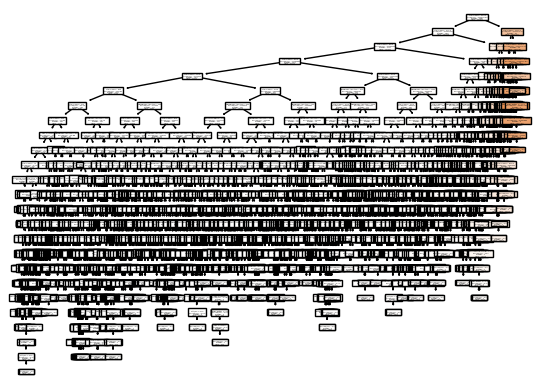

In [ ]:
tree.plot_tree(model1,feature_names=x.columns,filled=True)
plt.show()

#random forest Regressor


In [74]:
model2=RandomForestRegressor()
model2.fit(xtrain,ytrain)

RandomForestRegressor()

In [75]:
p3=model2.predict(xtest)
p3

array([2.274000e+01, 2.900000e-01, 2.220000e+00, 5.148000e+01,
       4.900000e-01, 2.042000e+01, 1.689400e+02, 8.000000e-02,
       9.515000e+01, 9.914000e+01, 2.350000e+00, 4.310000e+00,
       4.100000e-01, 1.299800e+02, 1.252200e+02, 0.000000e+00,
       6.359600e+02, 3.190000e+00, 5.655000e+01, 4.432000e+01,
       0.000000e+00, 7.160000e+00, 4.681800e+02, 3.189300e+02,
       2.716000e+01, 6.512000e+02, 6.600000e-01, 7.223000e+01,
       6.135000e+01, 2.129200e+02, 4.991000e+01, 8.600000e-01,
       1.125800e+02, 4.136400e+02, 1.402600e+02, 1.989000e+01,
       2.001800e+02, 3.390700e+02, 6.000000e-02, 7.000000e-01,
       3.142000e+01, 1.721100e+02, 5.950180e+03, 3.883000e+01,
       1.160500e+02, 3.486000e+01, 2.545000e+01, 1.930000e+00,
       5.535000e+01, 1.477500e+02, 1.510900e+02, 3.758000e+01,
       9.943000e+01, 5.035000e+02, 1.212100e+02, 5.038000e+01,
       1.512400e+02, 4.101000e+01, 7.180000e+00, 4.085900e+02,
       7.502800e+02, 1.130300e+02, 9.700000e+00, 1.0000

In [76]:
r2_score(ytest,p3)*100

95.70844107821259

#SVM-SVR

In [49]:
model3=SVR()
model3.fit(xtrain,ytrain)

SVR()

In [50]:
p4=model3.predict(xtest)

In [51]:
r2_score(ytest,p4)

-0.013632890799033959

#AdaBoost Regressor

In [52]:
model4=AdaBoostRegressor()
model4.fit(xtrain,ytrain)

AdaBoostRegressor()

In [53]:
p5=model4.predict(xtest)

In [54]:
r2_score(ytest,p5)*100

93.490595522946

#Dataframe Showing Training and Testing Accuracy

In [55]:
DaTaFrAme=pd.DataFrame({'Model Name':['Decision Tree Regressor','Random Forest Regressor','SVR','AdaBoost Rgressor'],'Training Acc':[100,99.46,-0.0028,96.88],'Testing Acc':[100,96.07,-0.013,94.55]})
DaTaFrAme

,Model Name,Training Acc,Testing Acc
0,Decision Tree Regressor,100.0000,100.000
1,Random Forest Regressor,99.4600,96.070
2,SVR,-0.0028,-0.013
3,AdaBoost Rgressor,96.8800,94.550


<Axes: >

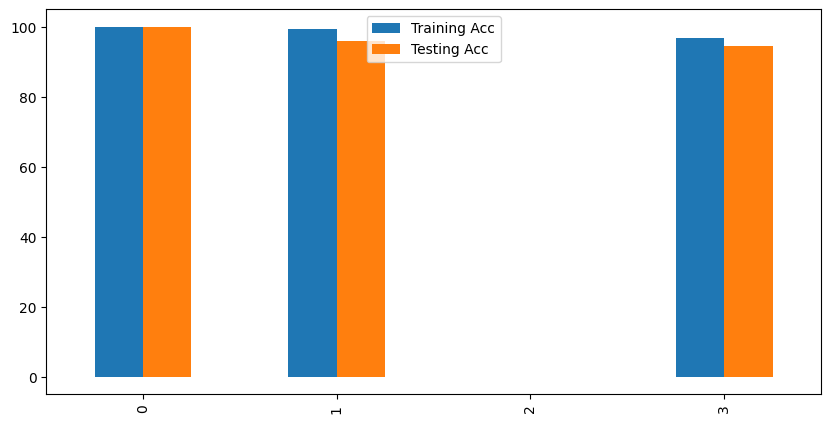

In [ ]:
DaTaFrAme.plot(kind='bar',figsize=(10,5))

#Prediction using outside Data

In [ ]:
v=[[7,0	,0.0,	0,	86.0,	8.0,	4	,2017,	164]]
c=model4.predict(v)
c

/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but AdaBoostRegressor was fitted with feature names
  warnings.warn(


array([258.86324786])

In [62]:
xtrain.iloc[0,:]

State/UT                         72.0
Dowry Deaths                     22.0
Murder with Rape                 27.0
Acid Attack                       5.0
Kidnapping & Abduction           56.0
Procuration of Minor Girls        0.0
Sexual Assault of Children        0.0
year                           2013.0
Total crimes                    177.0
Name: 2495, dtype: float64

In [57]:
import pickle

In [77]:
with open('rf_model.pickle', 'wb') as f:
    pickle.dump(model2, f)
f.close()

In [60]:
with open('le_encoder.pickle', 'wb') as f:
    pickle.dump(l, f)
f.close()

# DL APPROACH

#ANN


#Sampling

In [ ]:
x

,State/UT,Dowry Deaths,Murder with Rape,Acid Attack,Kidnapping & Abduction,Procuration of Minor Girls,Sexual Assault of Children,year,Total crimes
0,6,152,6.0,2,741.0,150.0,56,2017,8480
1,7,0,0.0,0,86.0,8.0,4,2017,164
2,8,193,27.0,3,5703.0,1286.0,205,2017,18015
3,10,1081,0.0,4,6188.0,0.0,697,2017,7970
4,14,75,3.0,0,1474.0,2.0,544,2017,2680
...,...,...,...,...,...,...,...,...,...
3605,4,0,2.0,0,1.0,1.0,1,2016,5
3606,4,0,1.0,0,1.0,1.0,1,2016,5
3607,4,0,0.0,0,0.0,1.0,1,2016,2
3608,4,0,1.0,0,1.0,1.0,1,2016,4


In [ ]:
y

0        7429.0
1          66.0
2       10598.0
3           0.0
4         582.0
         ...   
3605        0.0
3606        1.0
3607        0.0
3608        0.0
3609        0.0
Name: Cruelty by Husband or his relatives, Length: 3610, dtype: float64

#Splitting of data

In [ ]:
from pandas.core.common import random_state
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=43)

#importing Libraries

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout

#Model Creation

In [ ]:

# Build the model
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(xtrain.shape[1],)))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

#Configuration

In [ ]:
# Compile the model
model.compile(optimizer='adam', loss='mse', metrics=['accuracy'])



#Model Training

In [ ]:

# Train the model
model.fit(xtrain, ytrain, epochs=50, batch_size=64)

Epoch 1/50
46/46 [==============================] - 1s 2ms/step - loss: 2765869.7500 - accuracy: 0.0301
Epoch 2/50
46/46 [==============================] - 0s 2ms/step - loss: 2765869.5000 - accuracy: 0.0301
Epoch 3/50
46/46 [==============================] - 0s 2ms/step - loss: 2765869.7500 - accuracy: 0.0301
Epoch 4/50
46/46 [==============================] - 0s 2ms/step - loss: 2765870.0000 - accuracy: 0.0301
Epoch 5/50
46/46 [==============================] - 0s 2ms/step - loss: 2765869.5000 - accuracy: 0.0301
Epoch 6/50
46/46 [==============================] - 0s 2ms/step - loss: 2765870.0000 - accuracy: 0.0301
Epoch 7/50
46/46 [==============================] - 0s 2ms/step - loss: 2765869.5000 - accuracy: 0.0301
Epoch 8/50
46/46 [==============================] - 0s 2ms/step - loss: 2765870.0000 - accuracy: 0.0301
Epoch 9/50
46/46 [==============================] - 0s 2ms/step - loss: 2765869.7500 - accuracy: 0.0301
Epoch 10/50
46/46 [==============================] - 0s 2ms/step

# Model Evaluation

In [ ]:

# Evaluate the model on the test data
loss, accuracy = model.evaluate(xtest, ytest)
print(f'Test accuracy: {accuracy}')

23/23 [==============================] - 0s 2ms/step - loss: 3861443.0000 - accuracy: 0.0360
Test accuracy: 0.03601108118891716


In [ ]:
# Evaluate the model
test_loss, test_accuracy = model.evaluate(xtest.values.reshape(xtest.shape[0], xtest.shape[1], 1), ytest)
print('Test loss:', test_loss)
print('Test accuracy:', test_accuracy)


23/23 [==============================] - 0s 2ms/step - loss: 3861443.0000 - accuracy: 0.0360
Test loss: 3861443.0
Test accuracy: 0.03601108118891716


#RNN

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout

#Model Creation

In [ ]:
# Define the RNN model
model = Sequential()
model.add(LSTM(units=64, input_shape=(None, 1)))
model.add(Dense(units=1, activation='sigmoid'))

#Model Configuration

In [ ]:
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


#Model Training

In [ ]:
model.fit(xtrain, ytrain, epochs=20, batch_size=32)

Epoch 1/20
91/91 [==============================] - 1s 12ms/step - loss: -23336.7480 - accuracy: 0.0301
Epoch 2/20
91/91 [==============================] - 1s 12ms/step - loss: -25399.0586 - accuracy: 0.0301
Epoch 3/20
91/91 [==============================] - 1s 8ms/step - loss: -27439.9492 - accuracy: 0.0301
Epoch 4/20
91/91 [==============================] - 1s 7ms/step - loss: -29392.5938 - accuracy: 0.0301
Epoch 5/20
91/91 [==============================] - 1s 9ms/step - loss: -31309.8613 - accuracy: 0.0301
Epoch 6/20
91/91 [==============================] - 1s 13ms/step - loss: -33260.4297 - accuracy: 0.0301
Epoch 7/20
91/91 [==============================] - 1s 11ms/step - loss: -35393.2500 - accuracy: 0.0301
Epoch 8/20
91/91 [==============================] - 1s 7ms/step - loss: -37412.0469 - accuracy: 0.0301
Epoch 9/20
91/91 [==============================] - 1s 7ms/step - loss: -39371.7891 - accuracy: 0.0301
Epoch 10/20
91/91 [==============================] - 1s 7ms/step - lo

#Evaluation

In [ ]:

# Evaluate the model on the test data
loss, accuracy = model.evaluate(xtest, ytest)
print(f'Test accuracy: {accuracy}')

23/23 [==============================] - 1s 5ms/step - loss: -24112.5078 - accuracy: 0.0360
Test accuracy: 0.03601108118891716


In [ ]:
# Evaluate the model
test_loss, test_accuracy = model.evaluate(xtest.values.reshape(xtest.shape[0], xtest.shape[1], 1), ytest)
print('Test loss:', test_loss)
print('Test accuracy:', test_accuracy)

23/23 [==============================] - 1s 6ms/step - loss: -24112.5078 - accuracy: 0.0360
Test loss: -24112.5078125
Test accuracy: 0.03601108118891716
